 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part - (1) : Develop a neural network based classification network from scratch:**  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as $28 \times 28$ pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as $28 \times 28$ image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

1. Load MNIST data and create train, test splits  
- The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
   
- Code for downloading the data and creating train-test splits is provided    

2. Design a simple classification network    

- Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\vec{y}$ from the input $\vec{x}$ is computed as follows    
    
  $$ \vec{y} = h(\textbf{W}^{(3)}g(\textbf{W}^{(2)}g(\textbf{W}^{(1)}\vec{x}))) $$    

where $\textbf{W}^{(1)} \in \mathbb{R}^{512 \times 784}$,$\textbf{W}^{(2)} \in \mathbb{R}^{512 \times 512}$,$\textbf{W}^{(3)} \in \mathbb{R}^{10 \times 512} $ are the parameters of the network. g( . ) is the hidden layer activation function. h( . ) is the output layer activation function      
- Consider g( . ) as _ReLU_ activation function. _Softmax_ activation function should be used at the last layer h( . ), to get the posterior probability of the classes.    

- Training classification network:    

     - Flatten the $28 \times 28$ images to arrive at 784 dimensional vector.

    - Randomly initialize the parameters of network ,   
      $\textbf{W}^{(1) ^T} \in \mathbb{R}^{784 \times 512}$ , $\textbf{W}^{(2)^T} \in \mathbb{R}^{512 \times 512}$ , $\textbf{W}^{(3)^T} \in \mathbb{R}^{512 \times 10}$  
    - Feedforward the batch of input vectors to get the posterior probability of classes.     
    - Compute the loss between the estimated posterior probabilities and the true targets.      
    - Update the parameters of network to minimize the loss function.     
        - Backpropagate the loss function to get the gradients.           

        - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.           
        - Cleverly set the hyperparameters involved in this optimization process.        

3. Evaluate the performance of classification network    
    - feed-forward the MNIST data through the trained classification network to get class posteriors.      
    - Assign the input to the class having maximum posterior probability      
    - Compute the loss and accuaracy      
    - Report your observations      





In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


In [ ]:
import numpy as np
"""from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical"""
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)


Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)


Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 5/20, Train Loss: 1.5355, Train Accuracy: 91.51%, Validation Loss: 1.4437, Validation Accuracy: 92.05%
Epoch 10/20, Train Loss: 0.9988, Train Accuracy: 94.41%, Validation Loss: 1.2141, Validation Accuracy: 93.23%
Epoch 15/20, Train Loss: 0.7679, Train Accuracy: 95.68%, Validation Loss: 1.1707, Validation Accuracy: 93.55%
Epoch 20/20, Train Loss: 0.5408, Train Accuracy: 96.91%, Validation Loss: 1.1112, Validation Accuracy: 93.90%


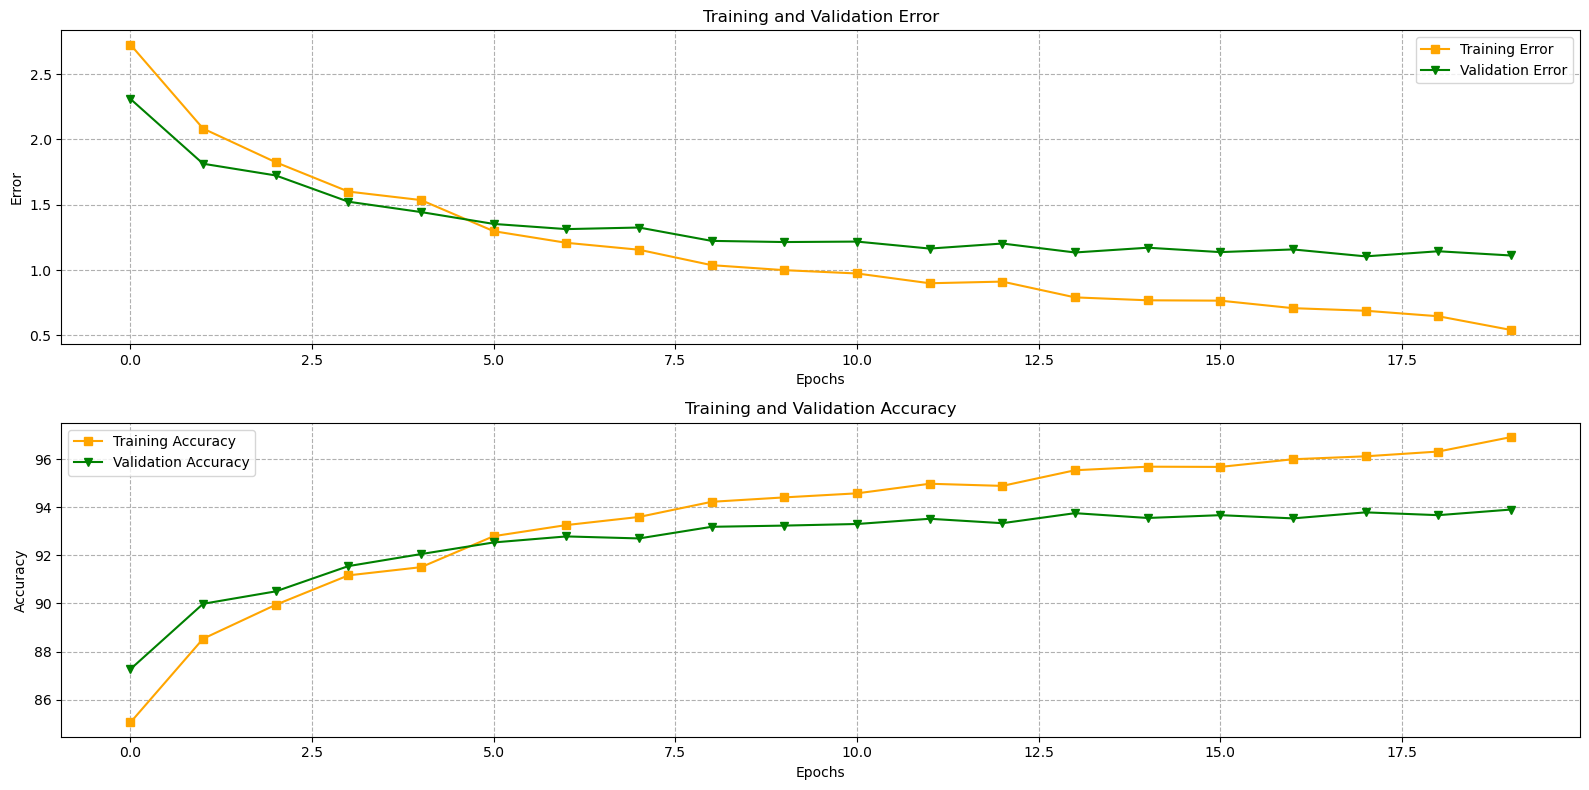

Test Loss: 1.2394, Test Accuracy: 93.20%


In [8]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.where(inp > 0, 1, 0)
  return outp


#Complete the below function to impliment softmax activation function
def softmax(inp): #, weights):
  z = inp
  sub=np.max(z, axis=1, keepdims=True)
  
  exp_z = np.exp(z - sub)  # Subtracting max(or dividing by max) for numerical stability in python

  outp = exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Normalized to get probabilities
  return outp

def activation_func(inp, name):
  
  if name.casefold() == 'sigmoid':  #considered piecewise for numerical stability in python
    ret_value = np.where(inp >= 0,
                    1 / (1 + np.exp(-inp)),
                    np.exp(inp) / (1 + np.exp(inp)))
    return 1 / (1 + np.exp(-inp))
  
  elif name.casefold() == 'tanh':
    return np.tanh(inp)
  
  elif name.casefold() == 'relu':
    return np.maximum(0, inp)
  
  elif name.casefold() == 'softmax':
    sub = np.max(inp, axis=1, keepdims=True)
    diff = inp - sub
    exp_z = np.exp(diff)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)
  
  elif name.casefold() == 'leakyrelu':  #considered \alpha as 0.01 (found emipirically on multiple runs)
    return np.where(inp > 0, inp, 0.01 * inp)
  
  elif name.casefold() == 'linear': #identity map
    return inp
  
  elif name.casefold() == 'softplus':
    ret_value = np.where(inp > 20, inp, np.log1p(np.exp(inp)))
    return ret_value
  else:
    raise ValueError("In 'activation_func' unknown activation function: {}".format(name))

def activation_func_grad(inp, name):
  
  if name.casefold() == 'sigmoid':
    sigma = activation_func(inp, 'sigmoid')
    return sigma * (1 - sigma)
  
  elif name.casefold() == 'tanh':
    return 1 - np.tanh(inp) ** 2
  
  elif name.casefold() == 'relu':
    return np.where(inp > 0, 1, 0)
  
  elif name.casefold() == 'leakyrelu':
    return np.where(inp > 0, 1, 0.01)
  
  elif name.casefold() == 'linear':
    return np.ones_like(inp)
  
  elif name.casefold() == 'softplus':
    ret_value = np.where(inp >= 0,
                    1 / (1 + np.exp(-inp)),
                    np.exp(inp) / (1 + np.exp(inp)))
    
    return ret_value
  else:
    raise ValueError("In 'activation_func_grad' unknown activation function: {}".format(name))
  


#Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights, names = ['ReLu', 'ReLu', 'Softmax']):
  # Inputs: input data, parameters of network
  W1, W2, W3 = weights
  active_func1, active_func2, active_func3 = names

  # First hidden layer with ReLU activation
  a1 = np.dot(inputs, W1)
  z1 = activation_func(a1, active_func1)

  # Second hidden layer with ReLU activation
  a2 = np.dot(z1, W2)
  z2 = activation_func(a2, active_func2)

  # Third hidden layer with softmax activation
  a3 = np.dot(z2, W3)
  outps = activation_func(a3, active_func3)#, np.eye(z3.shape[1]))  # Softmax applied to the output

  # Return the required outputs, i.e., final output and intermediate activations
  return [a1, z1, a2, z2, a3, outps]


#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, names = ['ReLu', 'ReLu', 'Softmax']):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, outps = activations
    active_func1, active_func2, active_func3 = names

    m = targets.shape[0]  # Number of samples

    # Compute loss (cross-entropy with softmax)
    """
    # cross-entropy loss calculated as requested , but isn't used in backpropagation since the errors are calculated in the function
    # training and the gradients are calculated indepentent of this loss value (seen after derivation of gradients for this loss function
    # [in class it was linear regression and here it's multiclass classification but the gradients are same (error * input of previous layer)])
    loss = -np.sum(targets * np.log(outps + 1e-8)) / m  # Numerical stability
    """

    # Gradient of loss w.r.t. output (softmax + cross-entropy)
    d_a3 = (outps - targets) / m  # (batch, 10)

    # Gradients for W3
    dj_dw3 = np.dot(z2.T, d_a3)  # (512, 10)

    # Backprop to layer 2
    d_z2 = np.dot(d_a3, W3.T)  # (batch, 512)

    try :
        d_a2 = d_z2 * activation_func_grad(a2, active_func2)
    except ValueError:
        raise ValueError("Unknown activation function: {}".format(active_func2))
    
    dj_dw2 = np.dot(z1.T, d_a2)  # (512, 512)

    # Backprop to layer 1
    d_z1 = np.dot(d_a2, W2.T)  # (batch, 512)

    try:
        d_a1 = d_z1 * activation_func_grad(a1, active_func1)
    except ValueError:
        raise ValueError("Unknown activation function: {}".format(active_func1))
    

    dj_dw1 = np.dot(inputs.T, d_a1)  # (784, 512)

    return [dj_dw1, dj_dw2, dj_dw3] #, loss


#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  # update the weights using the gradients
  W1_updated = W1 - learning_rate * dj_dw1
  W2_updated = W2 - learning_rate * dj_dw2
  W3_updated = W3 - learning_rate * dj_dw3

  #Return the updated parameters
  return [W1_updated, W2_updated, W3_updated]


#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, names = ['ReLu', 'ReLu', 'Softmax'],):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  #Compute the gradients (could returning "loss" also along with gradients from the function "computeGradients")
  gradients = computeGradients(inputs, targets, weights, activations, names)

  #Update the paramters using gradients
  updated_weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return updated_weights


##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001, names = ['ReLu', 'ReLu', 'Softmax'], print_it = 'print'):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = int(np.ceil((n_samples * train_val_split) / batch_size))

  if targets_idx.ndim == 1:
    #if not already one-hot encoded
    targets_idx = targets_idx.astype(int)
    assert np.issubdtype(targets_idx.dtype, np.integer), "targets_idx must contain integers"
    targets_onehot = np.zeros((n_samples, n_classes))
    targets_onehot[np.arange(n_samples), targets_idx] = 1
  else:
    targets_onehot = targets_idx  # already one-hot encoded

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data

  split_index = int(train_val_split * n_samples)
  x_train, y_train = inputs[:split_index], targets_onehot[:split_index]
  x_val, y_val = inputs[split_index:], targets_onehot[split_index:]

  #Randomly initialize the weights
  W1 = np.random.randn(inputs.shape[1], hidden_units)# * np.sqrt(2. / inputs.shape[1])
  W2 = np.random.randn(hidden_units, hidden_units)# * np.sqrt(2. / hidden_units)
  W3 = np.random.randn(hidden_units, n_classes)# * np.sqrt(2. / hidden_units)
 
  weights = [W1, W2, W3]

  tr_err = []
  tr_acc = []
  validation_err = []
  validation_acc = []

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data

    indices = np.arange(x_train.shape[0])
    np.random.shuffle(indices)
    x_train = x_train[indices]
    y_train = y_train[indices]

    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start = batch * batch_size
      end = min(start + batch_size, x_train.shape[0])
      x_batch = x_train[start:end]
      y_batch = y_train[start:end]

      #Forward propagation
      activations = fwdPropagate(x_batch, weights, names)

      #Backward propagation
      weights = backPropagate(x_batch, y_batch, weights, activations, learning_rate, names)

    #Compute outpus on trianing data
    train_out = (fwdPropagate(x_train, weights, names))[-1]

    #Compute training accuracy, and training error
    train_pred = np.argmax(train_out, axis=1)
    train_true = np.argmax(y_train, axis=1)
    train_acc = 100* np.mean(train_pred == train_true)
    train_loss = -np.sum(y_train * np.log(train_out + 1e-8)) / y_train.shape[0]
    tr_acc.append(train_acc)
    tr_err.append(train_loss)

    #Compute outputs on validation data
    val_out = (fwdPropagate(x_val, weights, names))[-1]

    #Compute validation accuracy, and validation error
    val_pred = np.argmax(val_out, axis=1)
    val_true = np.argmax(y_val, axis=1)
    val_acc = 100* np.mean(val_pred == val_true)
    val_loss = -np.sum(y_val * np.log(val_out + 1e-8)) / y_val.shape[0]
    validation_acc.append(val_acc)
    validation_err.append(val_loss)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    if (epoch +1 ) % 5 == 0 and print_it.casefold()== 'print':
      print(f"Epoch {epoch+1}/{epochs},",f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,",f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

    #Save the parameters of network
    """
    np.save("weights_epoch_{}.npy".format(epoch+1), weights)
    np.savez('model_weights.npz', W1=W1, W2=W2, W3=W3)
    Load the parameters of network
    data = np.load('model_weights.npz')
    W1 = data['W1']
    W2 = data['W2']
    W3 = data['W3']
    """

  return tr_err, tr_acc, validation_err, validation_acc, weights


#Call the training function to train the network
tr_err, tr_acc, validation_err, validation_acc, trained_weights  = training(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9, learning_rate=0.001, names = ['ReLu', 'ReLu', 'Softmax'], print_it = 'print')

# additional plot for visualization
fig , axes = plt.subplots(2, 1, figsize=(16, 8))
axes[0].plot(tr_err, label='Training Error',marker = "s" , color = 'orange')
axes[0].plot(validation_err, label='Validation Error',marker = 'v', color = 'green')
axes[0].set_title('Training and Validation Error')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Error')
axes[0].grid(axis = 'both', linestyle = '--')
axes[0].legend()

axes[1].plot(tr_acc, label='Training Accuracy', marker = "s" , color = 'orange')
axes[1].plot(validation_acc, label='Validation Accuracy', marker = 'v', color = 'green')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].grid(axis = 'both', linestyle = '--')
axes[1].legend()

plt.tight_layout()
plt.show()

##################################################
#Evaluate the performance on test data
##################################################

test_out = (fwdPropagate(x_test, trained_weights, names = ['ReLu', 'ReLu', 'Softmax']))[-1]
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


**Report your observations**

1. For SGD algorithm with the predefined parameters, upon 10 epochs itself, the network gives a training accuracy of $85\% \sim 88\%$ . Along with validation accuracy of $88\% \sim 92\%$.  
With testing accuracy arround $\sim 90\%$.

2. Upon increasing the number of epochs, (here upto 20 here), the training accuracy along with validation accuracy touches atmost $96\% \; \& \; 93\%$ respectively.  
With testing accuracy being arround $92\%$

3. When observed, with arround 15 epochs, and hidden layer having $50 \sim 60$ neurons provides almost same level of accuracy.  
Thus increasing the number of neurons in the hidden layers **might just increase** the chances of overfitting to training data

**Part - (2) : Understanding activation functions:** In this part you will learn to use different activation functions for the classification task and compare their performances.

  1. Train MNIST digit classification network with different activation functions i.e. _Sigmoid, Tanh, ReLU, LeakyReLU_ etc. You can stick to stochastic gradient descent optimization algorithm for this part    
  2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.



In [9]:
##################################################
#Train the network with different activation functions
##################################################

# using sigmoid activation function instead of ReLU for 1st and 2nd layer
*_, trained_weights_sigmoid  = training(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9, learning_rate=0.001, names = ['Sigmoid', 'Sigmoid', 'Softmax'], print_it = 'no print')
print("Network trained with sigmoid activation function")

# using tanh activation function instead of ReLU for 1st and 2nd layer
*_, trained_weights_tanh  = training(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9, learning_rate=0.001, names = ['tanh', 'tanh', 'Softmax'], print_it = 'no print')
print("Network trained with tanh activation function")


##################################################
#Evaluate the performance on MNIST test data
##################################################

print("\nEvaluating the performance of network trained with sigmoid activation function : ")
#Compute outputs on test data
test_out = (fwdPropagate(x_test, trained_weights_sigmoid, names = ['Sigmoid', 'Sigmoid', 'Softmax']))[-1]

#Compute test accuracy, and test error
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

print("\nEvaluating the performance of network trained with tanh activation function : ")
#Compute outputs on test data
test_out = (fwdPropagate(x_test, trained_weights_tanh, names = ['tanh', 'tanh', 'Softmax']))[-1]

#Compute test accuracy, and test error
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


Network trained with sigmoid activation function
Network trained with tanh activation function

Evaluating the performance of network trained with sigmoid activation function : 
Test Loss: 2.8129, Test Accuracy: 56.46%

Evaluating the performance of network trained with tanh activation function : 
Test Loss: 4.6275, Test Accuracy: 62.55%


In [12]:
# using leaky ReLU activation function instead of ReLU for 1st and 2nd layer
*_, trained_weights_leaky_relu  = training(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9, learning_rate=0.001, names = ['leakyReLu', 'leakyReLu', 'Softmax'], print_it = 'print')
print("Network trained with leaky ReLU activation function")

print("\nEvaluating the performance of network trained with leaky ReLU activation function : ")
#Compute outputs on test data
test_out = (fwdPropagate(x_test, trained_weights_leaky_relu, names = ['leakyReLu', 'leakyReLu', 'Softmax']))[-1]

#Compute test accuracy, and test error
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


Epoch 5/20, Train Loss: 1.4585, Train Accuracy: 91.93%, Validation Loss: 1.4721, Validation Accuracy: 91.92%
Epoch 10/20, Train Loss: 1.1166, Train Accuracy: 93.80%, Validation Loss: 1.2947, Validation Accuracy: 92.90%
Epoch 15/20, Train Loss: 0.7830, Train Accuracy: 95.60%, Validation Loss: 1.1563, Validation Accuracy: 93.65%
Epoch 20/20, Train Loss: 0.6527, Train Accuracy: 96.29%, Validation Loss: 1.1059, Validation Accuracy: 93.87%
Network trained with leaky ReLU activation function

Evaluating the performance of network trained with leaky ReLU activation function : 
Test Loss: 1.2280, Test Accuracy: 93.26%


**Report your observations**

1. Upon examining sigmoid and tanh functions separately, they provide different output accuracy on test data (almost $\sim 1.07$ times difference).  
This difference is because of change in the way batches are chosen while training , resulting in completely different weights.  
$58\%$ accuracy for _Sigmoid_ and $62\%$ accuracy for _Tanh_ activation function. This low accuracy is is expected as the _Sigmoid_ and _Tanh_ functions are not able to learn the weights properly due to the vanishing gradients issue.

2. But when the above activation function is applied for _SAME_ batches , we observe that the output accuracy on test data is now almost $1.25$ times different with output accuracy for $Sigmoid \lt Tanh $ on same batches & same number of epochs.  
This is expected as the way the weights learn are such that in both cases , the training accuracy and validation accuracy are almost $1.5$ times smaller for _Sigmoid_ than _Tanh_  for every epoch.

3. Due to the vanishing gradients issues with the _Sigmoid_ & _Tanh_ functions, the accuracy on the test data is less than that of a _ReLu_ activation.  
When _ReLu_ is replaced with _LeakyRelu_ activation, the accuracy is better than _ReLu_ because it is a relaxed version of _ReLu_ activation giving a chance for negative activations to exist.  
$93\%$ accuracy for _LeakyReLu_ activation function.

**Part - (3) : Understanding optimization algorithms:** In this part you will learn to use different optimiztion algorithm apart from SGD.

  1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm.    
  2. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms.    
  3. Report your observations.    

In [19]:
##################################################
#Train the network using Adam optimizer
##################################################
  
def applyDropout(layer_input, dropout_prob=0.2, dropout_training=True):
    """
    Applies dropout during training. During inference, dropout is not applied.
    """
    if dropout_training:
        mask = np.random.rand(*layer_input.shape) > dropout_prob  # Create mask(0 or 1) based on dropout probability
        return (layer_input * mask)  # Apply mask to the layer
    
    return layer_input

def fwdPropagateAdam(inputs, weights, names = ['ReLu', 'ReLu', 'Softmax'], dropout_prob=0.2, dropout_training=False):
  # Inputs: input data, parameters of network
  W1, W2, W3 = weights
  active_func1, active_func2, active_func3 = names

  # First hidden layer with ReLU activation
  a1 = np.dot(inputs, W1)
  z1 = activation_func(a1, active_func1)
  z1 = applyDropout(z1, dropout_prob, dropout_training)  # Apply dropout

  # Second hidden layer with ReLU activation
  a2 = np.dot(z1, W2)
  z2 = activation_func(a2, active_func2)
  z2 = applyDropout(z2, dropout_prob, dropout_training)  # Apply dropout

  # Third hidden layer with softmax activation
  a3 = np.dot(z2, W3)
  outps = activation_func(a3, active_func3)#, np.eye(z3.shape[1]))  # Softmax applied to the output

  # Return the required outputs, i.e., final output and intermediate activations
  return [a1, z1, a2, z2, a3, outps]

# Adam optimizer
def applyGradientsAdam(weights, gradients, moments, t, learning_rate,lambda_reg, beta1=0.9, beta2=0.999, epsilon=1e-8):
    updated_weights = []
    updated_moments = []
    
    for W, g, (m_prev, v_prev) in zip(weights, gradients, moments):
        g = g + lambda_reg * W  # Add L2 regularization to gradients
        m = beta1 * m_prev + (1 - beta1) * g
        v = beta2 * v_prev + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        W_update = W - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        updated_weights.append(W_update)
        updated_moments.append((m, v))

    return updated_weights, updated_moments

def backPropagateAdam(inputs, targets, weights, activations, learning_rate, moments, t,lambda_reg=0.01, names = ['leakyReLu', 'leakyReLu', 'Softmax']):
    
    gradients = computeGradients(inputs, targets, weights, activations, names)
    
    weights, moments = applyGradientsAdam(weights, gradients, moments, t, learning_rate,lambda_reg,beta1=0.9, beta2=0.999, epsilon=1e-8,)
    
    return weights, moments

def trainingAdam(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001, names = ['leakyReLu', 'leakyReLu', 'Softmax'],lambda_reg=0.01,dropout_prob=0.2,dropout_training=False,waiting = 5, print_it = 'print'):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    
    targets_onehot = targets_idx

    # Train-validation split
    split_index = int(train_val_split * n_samples)
    train_inputs = inputs[:split_index]
    train_targets = targets_onehot[:split_index]
    val_inputs = inputs[split_index:]
    val_targets = targets_onehot[split_index:]

    n_batches = int(np.ceil(train_inputs.shape[0] / batch_size))

    # Weight initialization
    W1 = np.random.randn(inputs.shape[1], hidden_units) * np.sqrt(2. / inputs.shape[1])
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    # Adam moments
    moments = [(np.zeros_like(W1), np.zeros_like(W1)),
               (np.zeros_like(W2), np.zeros_like(W2)),
               (np.zeros_like(W3), np.zeros_like(W3))]

    t = 1  # timestep for Adam
    validation_err = []

    for epoch in range(epochs):
        # Shuffle training data
        
        """ 
        permutation = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[permutation]
        train_targets = train_targets[permutation]
        """
        
        indices = np.arange(train_inputs.shape[0])
        np.random.shuffle(indices)
        train_inputs = train_inputs[indices]
        train_targets = train_targets[indices]

        for batch in range(n_batches):
            start = batch * batch_size
            end = min(start + batch_size, train_inputs.shape[0])
            x_batch = train_inputs[start:end]
            y_batch = train_targets[start:end]

            activations = fwdPropagateAdam(x_batch, weights, names,dropout_prob,dropout_training,)
            weights, moments = backPropagateAdam(x_batch, y_batch, weights, activations, learning_rate, moments, t,lambda_reg, names)
            t += 1

        # Train accuracy
        train_outputs = (fwdPropagate(train_inputs, weights, names))[-1]
        train_preds = np.argmax(train_outputs, axis=1)
        train_true = np.argmax(train_targets, axis=1)
        train_accuracy =100* np.mean(train_preds == train_true)
        train_loss = -np.sum(train_targets * np.log(train_outputs + 1e-8)) / train_targets.shape[0]

        # Validation accuracy
        val_outputs = fwdPropagate(val_inputs, weights, names)[-1]
        val_preds = np.argmax(val_outputs, axis=1)
        val_true = np.argmax(val_targets, axis=1)
        val_accuracy =100* np.mean(val_preds == val_true)
        val_loss = -np.sum(val_targets * np.log(val_outputs + 1e-8)) / val_targets.shape[0]
        validation_err.append(val_loss)
        
        # Early stopping
        if waiting > 0: #unless you wait for atleast 1 epoch
            if len(validation_err) == (waiting+1):
                if validation_err[-1] > np.mean(validation_err[-(waiting + 1):-1]):
                    print(f"Early stopping at epoch {epoch + 1} as validation loss didn't improve.")
                    break
            elif len(validation_err) > (waiting+1):
                del validation_err[0]
        
        if (epoch +1 ) % 5 == 0 and print_it.casefold()== 'print':
            print(f"Epoch {epoch+1}/{epochs} , Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f} , Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
            
    """plt.plot(validation_err, label='Validation Error', marker = 'v', color = 'green')
    plt.title('Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.grid(axis = 'both', linestyle = '--')
    plt.legend()"""

    return weights

trained_weights = trainingAdam(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9, learning_rate=0.001, names = ['leakyReLu', 'leakyReLu', 'Softmax'],lambda_reg=0,dropout_prob=0.2,dropout_training=False,waiting=0, print_it = 'print')
print("Network trained with Adam optimizer under leaky ReLu activation function")

##################################################
#Compare the accuracies and report your observations
##################################################

print("\nEvaluating the performance of network trained with Adam optimizer : ")
test_out = (fwdPropagate(x_test, trained_weights, names = ['leakyReLu', 'leakyReLu', 'Softmax']))[-1]
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


Epoch 5/20 , Train Loss: 0.0144, Train Accuracy: 99.5630 , Validation Loss: 0.0594, Validation Accuracy: 98.1667
Epoch 10/20 , Train Loss: 0.0074, Train Accuracy: 99.7574 , Validation Loss: 0.0795, Validation Accuracy: 98.1500
Epoch 15/20 , Train Loss: 0.0098, Train Accuracy: 99.6907 , Validation Loss: 0.0889, Validation Accuracy: 98.2500
Epoch 20/20 , Train Loss: 0.0101, Train Accuracy: 99.6741 , Validation Loss: 0.1022, Validation Accuracy: 97.9833
Network trained with Adam optimizer under leaky ReLu activation function

Evaluating the performance of network trained with Adam optimizer : 
Test Loss: 0.1081, Test Accuracy: 97.94%


**Report your observations**

1. Summary of what i understood from the Adam optimization algorithm :  
   $
   \texttt{is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.}  \\
   \texttt{It is a popular optimization algorithm for training deep NN models.  } \\
   \texttt{The Adam optimizer is computationally efficient and has low memory requirements.  } \\
   \texttt{It is also invariant to diagonal rescaling of the gradients.  } \\
   \texttt{The Adam optimizer is well suited for non-stationary objectives and problems with very noisy or sparse gradients.}
   $

2.  Under the same conditions, the accuracy of the network trained with Adam optimization algorithm is better than that of SGD.  
    The training accuracy is around $99\%$ and validation accuracy is around $97\%$ for Adam.  
    The testing accuracy is around $98\%$ for Adam.  
    The training accuracy is around $96\%$ and validation accuracy is around $93\%$ for SGD.  
    The testing accuracy is around $92\%$ for SGD.

3. Traing of each batch of data is better in Adam's optimization and due to extra momentum features of this algorithm, the weights / error updates are smoother and thus the accuracies are better than SGD.  



**Part - (4) : Understanding regularization methods:** In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.  

  1. Weight regularization: Add regularization term to the classification los    
  2. Dropout with a probability of $0.2$: Randomly drop the activation potentials of hidden neural with $0.2$ probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.     
  3. Early stopping: Stop the network training when it is started to overfitting to training data.    


In [20]:
##################################################
# Training with weight regularization
##################################################
print("\nTraining the network with weight regularization under Adam's: ")
trained_weights = trainingAdam(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9, learning_rate=0.001, names = ['leakyReLu', 'leakyReLu', 'Softmax'], lambda_reg=0.01,dropout_prob=0.2,dropout_training=False,waiting=0, print_it = 'print')

print("\nEvaluating the performance of network trained with Adam optimizer and weight regularization : ")
test_out = (fwdPropagate(x_test, trained_weights, names = ['leakyReLu', 'leakyReLu', 'Softmax']))[-1]
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Training the network with weight regularization under Adam's: 
Epoch 5/20 , Train Loss: 0.2256, Train Accuracy: 94.5315 , Validation Loss: 0.1872, Validation Accuracy: 95.9167
Epoch 10/20 , Train Loss: 0.2177, Train Accuracy: 94.7519 , Validation Loss: 0.1857, Validation Accuracy: 95.7167
Epoch 15/20 , Train Loss: 0.2078, Train Accuracy: 94.9130 , Validation Loss: 0.1734, Validation Accuracy: 96.2833
Epoch 20/20 , Train Loss: 0.2124, Train Accuracy: 95.0093 , Validation Loss: 0.1801, Validation Accuracy: 96.2333

Evaluating the performance of network trained with Adam optimizer and weight regularization : 
Test Loss: 0.2038, Test Accuracy: 95.15%


In [21]:
##################################################
#Training with dropout strategy
##################################################
print("\nTraining the network with dropout under Adam's: ")
trained_weights = trainingAdam(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9, learning_rate=0.001, names = ['leakyReLu', 'leakyReLu', 'Softmax'], lambda_reg=0,dropout_prob=0.2,dropout_training=True,waiting=0, print_it = 'print')

print("\nEvaluating the performance of network trained with Adam optimizer and dropouts : ")
test_out = (fwdPropagate(x_test, trained_weights, names = ['leakyReLu', 'leakyReLu', 'Softmax']))[-1]
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Training the network with dropout under Adam's: 
Epoch 5/20 , Train Loss: 0.0258, Train Accuracy: 99.2093 , Validation Loss: 0.0893, Validation Accuracy: 98.1333
Epoch 10/20 , Train Loss: 0.0111, Train Accuracy: 99.6444 , Validation Loss: 0.0975, Validation Accuracy: 98.4167
Epoch 15/20 , Train Loss: 0.0052, Train Accuracy: 99.8370 , Validation Loss: 0.1103, Validation Accuracy: 98.3667
Epoch 20/20 , Train Loss: 0.0112, Train Accuracy: 99.7037 , Validation Loss: 0.1337, Validation Accuracy: 98.2833

Evaluating the performance of network trained with Adam optimizer and dropouts : 
Test Loss: 0.1434, Test Accuracy: 98.15%


In [22]:
##################################################
#Training with early stopping criterion
##################################################
print("\nTraining the network with early stopping criterion(16 here) under Adam's: ")
trained_weights = trainingAdam(x_train, y_train, batch_size=128, epochs=60, train_val_split=0.9, learning_rate=0.001, names = ['leakyReLu', 'leakyReLu', 'Softmax'], lambda_reg=0,dropout_prob=0.2,dropout_training=False,waiting=15, print_it = 'print')

print("\nEvaluating the performance of network trained with Adam optimizer and early stopping criterion : ")
#Compute outputs on test data
test_out = (fwdPropagate(x_test, trained_weights, names = ['leakyReLu', 'leakyReLu', 'Softmax']))[-1]
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Training the network with early stopping criterion(16 here) under Adam's: 
Epoch 5/60 , Train Loss: 0.0207, Train Accuracy: 99.3556 , Validation Loss: 0.0821, Validation Accuracy: 97.9333
Epoch 10/60 , Train Loss: 0.0105, Train Accuracy: 99.7000 , Validation Loss: 0.0860, Validation Accuracy: 98.2167
Epoch 15/60 , Train Loss: 0.0088, Train Accuracy: 99.7407 , Validation Loss: 0.0909, Validation Accuracy: 98.3000
Early stopping at epoch 16 as validation loss didn't improve.

Evaluating the performance of network trained with Adam optimizer and early stopping criterion : 
Test Loss: 0.0968, Test Accuracy: 98.17%


**Report your observations**

1. After Regularization of weights, the accuracy is generally expected to increase but here , it's not since the weights that were initialized were already small but now, we are stopping the weights to grow that might cause mis-fit for the network thus the acuracy is low for weight regularization task.  
In the other hand if the weights were initialized to higher values then the weight regularization would have helped in reducing the overfitting.  
Here the accuracy is arround $96\%$ for weight regularization.

2. The dropout layer is a regularization technique that helps to reduce overfitting by randomly dropping out a fraction of the neurons during training.
   This forces the network to learn more robust features and prevents it from relying too heavily on any one neuron.  
   The dropout layer is disabled during inference, so all neurons are used for prediction.  
   Thus the accuracy with the dropedout trained NN gives a slightly better accuracy then the original Adam's trained NN always.  
   The accuracy is arround $98\%$ for dropout regularization task(Which falls under same range as that of the original Adam's optimization , but always $\ge$ Ordinary Adam's optimization ).
3. Since the weights were intilized to be _Fit_ weights, thus the convergence is smoother, for an early stopping criterion of $waiting = 10$ epochs and a total of $30$ epochs, the validation error is expected to be the least @ latest iteration, but if this criterion fails, then the early stopping condition is now activated and the algorithm training stops.  
here, the algorithm stops at arround 11th epoch as the accuracy isn't increasing.  
Here thus, the final accuracy is now arround $97\% \sim 98\%$ for Test data



**Part - (5) : Comparision with linear classifiers:** In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

  1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
   
  2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use $90\%$ of data for training and $10\%$ for testing.       

  **Programming questions:**   

  3. Linear classification models - logistic regression (Iterative reweighted least squares approach): logistic regression model: $y = \frac{1}{1+e^{-\vec{w}^{T}\vec{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\vec{w}$ that accurately predicts y based on the input $\vec{x}$. Subsequently, this $\vec{w}$ can be applied to predict outcomes on the test data X_test.

  a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\vec{w}$ using the training data. You can initialize $\vec{w}$ with random values and iteratively update it to determine the optimal $\vec{w}$. Subsequently, this optimal $\vec{w}$ can be employed to make predictions on the test data.
   
  b). Evaluate the classification performance, i.e., compute the accuracy on the test data.    
  c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors.    

  4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\vec{y}$ from the input $\vec{x}$ is computed as follows   

  $$ \vec{y} = h(\textbf{W}^{(3)}g(\textbf{W}^{(2)}g(\textbf{W}^{(1)}\vec{x}))) $$   

  - where $\textbf{W}^{(1)} \in \mathbb{R}^{3 \times 2}$ , $\textbf{W}^{(2)} \in \mathbb{R}^{3 \times 3}$ , $\textbf{W}^{(3)} \in \mathbb{R}^{1 \times 3}$ are the parameters of the network. g( . ) is the hidden layer activation function. h( . ) is the output layer activation function      

    - Consider g( . ) as _ReLU_ activation function. _Sigmoid_ activation function should be used at the last layer h( . ), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability).    
    - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3-D activation potentials at second layer. Plot them and observe how they distribute in the 3-D space compared to the original 2-D space.    
    - Evaluate the classification performance on test data. Report your observations    

  5. Compare linear classification models with the deep neural network based classification models. Report your observations.    



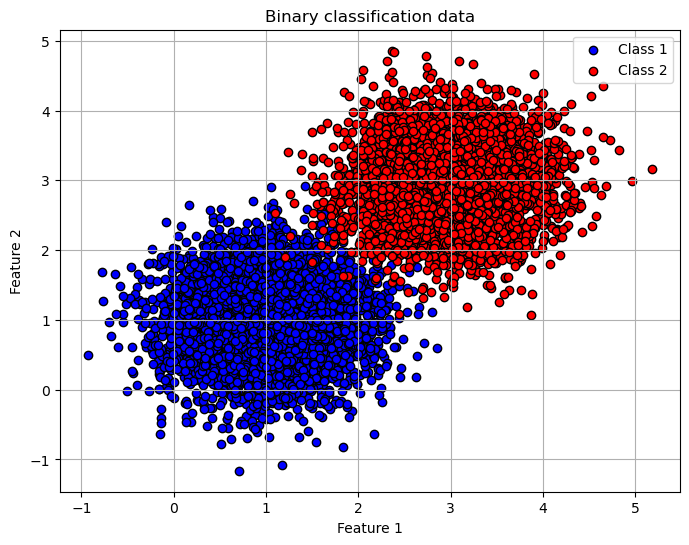

In [58]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]

#train data made
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

indices = np.arange((tr_data.shape[0]))
np.random.shuffle(indices)
tr_data = tr_data[indices]
tr_targets = tr_targets[indices]

#test data made
class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

indices = np.arange((te_data.shape[0]))
np.random.shuffle(indices)
te_data = tr_data[indices]
te_targets = tr_targets[indices]



#Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1', edgecolors='k')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_grad(z):
    ret_val = sigmoid(z)
    return ret_val * (1 - ret_val)


def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter = 10_000 #max number of ierations for parameter update
  
  #threshold chosen empirically
  threshold = 0.5 #threshold for classification
  X_tr = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) #Data. Append ones to the training data to take care of the bias
  X_te = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  w = np.zeros(X_tr.shape[1]) #Initialize the weight vector

  for _ in range(max_iter):
    preds = sigmoid(X_tr @ w) #Predictions on X. Sigmoid($\vec{w}^{T}\cdot\vec{x}$) our y_n in class
    error = preds - Y_train #Difference between preds and Y_train
    grad = X_tr.T @ error

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    R = np.diag(preds * (1 - preds))
    H = X_tr.T @ R @ X_tr

    #Update the weight vector
    # if H turns out to be singular, use psuedo inverse
    try:
        delta_w = np.linalg.inv(H) @ grad
    except np.linalg.LinAlgError:
        delta_w = np.linalg.pinv(H) @ grad

    w -= delta_w

    if np.linalg.norm(delta_w) < 1e-6:  #limit to be chose empirically
      #if w reaches a certain range of ceonvergence criteriom,
      # break the loop by reducing number of iterations
      break

  #Test data predictions
  test_preds = sigmoid(X_te@ w)

  #Compare the predictions with 0, to output the decision
  test_preds = (test_preds>= threshold).astype(int)

  #Return the predicted test labels
  return test_preds, w


Y_pred, w_Logistic = Logistic_Regression(tr_data, tr_targets, te_data)

acc = 100*np.mean(te_targets == Y_pred)
print(f"Accuracy of Logistic Regression on Linearly seperable data: {acc:.2f}%")



Accuracy of Logistic Regression on Linearly seperable data: 99.50%


Epoch 100/500 , Train Loss: 0.0169, Train Accuracy: 99.4815 , Validation Loss: 0.0133, Validation Accuracy: 99.3333
Epoch 200/500 , Train Loss: 0.0177, Train Accuracy: 99.3951 , Validation Loss: 0.0140, Validation Accuracy: 99.2222
Epoch 300/500 , Train Loss: 0.0184, Train Accuracy: 99.3457 , Validation Loss: 0.0147, Validation Accuracy: 99.2222
Epoch 400/500 , Train Loss: 0.0173, Train Accuracy: 99.3951 , Validation Loss: 0.0137, Validation Accuracy: 99.3333
Epoch 500/500 , Train Loss: 0.0193, Train Accuracy: 99.3951 , Validation Loss: 0.0158, Validation Accuracy: 99.4444
network now trained with Adam optimizer for linearly separable data


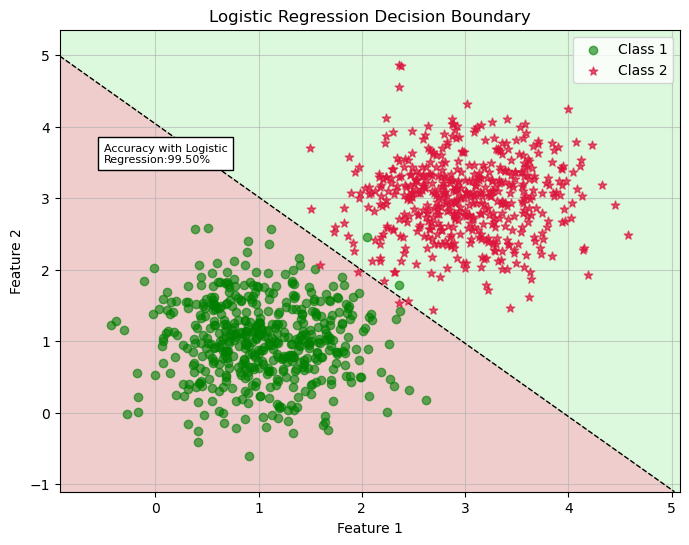

Test Loss: 4782.1401, Test Accuracy: 99.70%


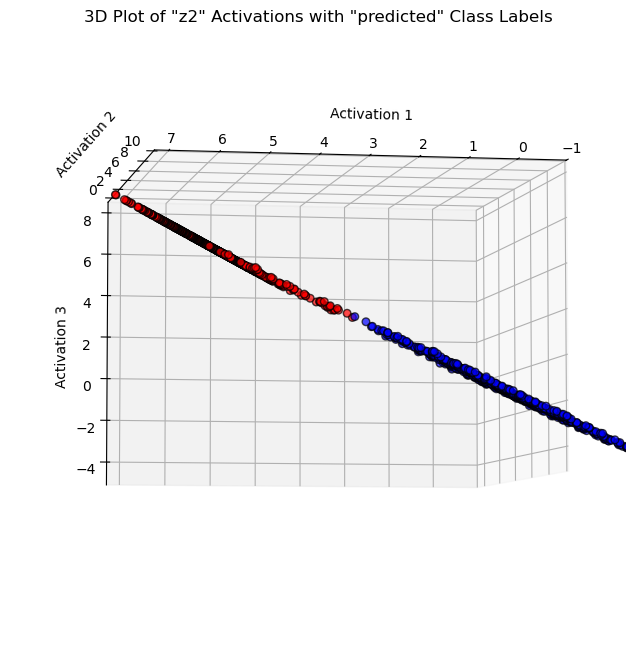

In [65]:
##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################
def ReLu(x):
  return np.maximum(0, x)
def gradReLu(x):
  return np.where(x > 0, 1, 0)

def fwdPropagateNew(inputs, weights,bias):# names = ['ReLu', 'ReLu', 'Softmax']):
  # Inputs: input data, parameters of network
  W1, W2, W3 = weights
  bias1, bias2, bias3 = bias
  
  # First hidden layer with ReLU activation
  a1 = np.dot(inputs, W1) + bias1
  z1 = ReLu(a1)

  # Second hidden layer with ReLU activation
  a2 = np.dot(z1, W2) + bias2
  z2 = ReLu(a2)

  # Third hidden layer with softmax activation
  a3 = np.dot(z2, W3) + bias3
  outps = sigmoid(a3)  # Softmax applied to the output

  # Return the required outputs, i.e., final output and intermediate activations
  return [a1, z1, a2, z2, a3, outps]

def computeGradientsNew(inputs, targets, weights, activations, names = ['ReLu', 'ReLu', 'Softmax']):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, outps = activations

    m = targets.shape[0]  # Number of samples

    # Compute loss (cross-entropy with softmax)
    """
    # cross-entropy loss calculated as requested , but isn't used in backpropagation since the errors are calculated in the function
    # training and the gradients are calculated indepentent of this loss value (seen after derivation of gradients for this loss function
    # [in class it was linear regression and here it's multiclass classification but the gradients are same (error * input of previous layer)])
    loss = -np.sum(targets * np.log(outps + 1e-8) + (1-targets) * np.log(1- outps + 1e-8)) / m  # Numerical stability
    """

    # Gradient of loss w.r.t. output (softmax + cross-entropy)
    d_a3 = (outps - targets) / m  # (batch, 1)

    # Gradients for W3
    dj_dw3 = np.dot(z2.T, d_a3)  # (3, 1)
    dj_b3 = np.sum(d_a3, axis=0, keepdims=True)  # (1, 1)

    # Backprop to layer 2
    d_z2 = np.dot(d_a3, W3.T)  # (batch, 3)

    d_a2 = d_z2 * gradReLu(a2)
    #d_a2 = d_z2 * gradReLu(a2)  # Apply ReLU derivative

    dj_dw2 = np.dot(z1.T, d_a2)  # (3, 3)
    dj_b2 = np.sum(d_a2, axis=0, keepdims=True)  # (1, 3)

    # Backprop to layer 1
    d_z1 = np.dot(d_a2, W2.T)  # (batch, 3)

    d_a1 = d_z1 * gradReLu(a1)
    #d_a1 = d_z1 * gradReLu(a1)  # Apply ReLU derivative

    dj_dw1 = np.dot(inputs.T, d_a1)  # (2, 3)
    dj_b1 = np.sum(d_a1, axis=0, keepdims=True)  # (1, 3)

    return [dj_dw1, dj_dw2, dj_dw3], [dj_b1, dj_b2, dj_b3] #, loss

def applyGradientsAdamNew(weights, gradients, bias, bias_gradients, moments, t, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    updated_weights = []
    updated_moments = []
    updated_biases = []
    
    for W, g, b, db, (m_prev, v_prev) in zip(weights, gradients, bias, bias_gradients, moments):
        m = beta1 * m_prev + (1 - beta1) * g
        v = beta2 * v_prev + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        W_update = W - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        bias_update = b - learning_rate * db
        
        updated_biases.append(bias_update)
        updated_weights.append(W_update)
        updated_moments.append((m, v))

    return updated_weights, updated_biases, updated_moments
  
def backPropagateAdamNew(inputs, targets,weights, bias, activations, learning_rate, moments, t, names = ['leakyReLu', 'leakyReLu', 'Softmax']):
    
    weight_gradients, bias_gradients = computeGradientsNew(inputs, targets, weights, activations, names)
    
    weights, bias, moments = applyGradientsAdamNew(weights, weight_gradients, bias, bias_gradients, moments, t, learning_rate,beta1=0.9, beta2=0.999, epsilon=1e-8,)
    
    return weights, bias, moments


def trainingAdamNew(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001, names = ['ReLu', 'ReLu', 'Softmax'], print_it = 'print'):
    hidden_units = 3
    n_classes = 1
    n_samples = inputs.shape[0]


    targets_onehot = targets_idx.reshape(-1,1)

    # Train-validation split
    split_index = int(train_val_split * n_samples)
    train_inputs = inputs[:split_index]
    train_targets = targets_onehot[:split_index]
    val_inputs = inputs[split_index:]
    val_targets = targets_onehot[split_index:]

    n_batches = int(np.ceil(train_inputs.shape[0] / batch_size))

    # Weight initialization
    W1 = np.random.randn(inputs.shape[1], hidden_units) * np.sqrt(2. / (inputs.shape[1]))
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / (hidden_units))
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / (hidden_units))
    weights = [W1, W2, W3]
    b1 = np.zeros((1, hidden_units))
    b2 = np.zeros((1, hidden_units))
    b3 = np.zeros((1, n_classes))
    bias = [b1, b2, b3]

    # Adam moments
    moments = [(np.zeros_like(W1), np.zeros_like(W1)),
               (np.zeros_like(W2), np.zeros_like(W2)),
               (np.zeros_like(W3), np.zeros_like(W3))]

    t = 1  # timestep for Adam

    for epoch in range(epochs):
        # Shuffle training data
        
        """ 
        permutation = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[permutation]
        train_targets = train_targets[permutation]
        """
        
        indices = np.arange(train_inputs.shape[0])
        np.random.shuffle(indices)
        train_inputs = train_inputs[indices]
        train_targets = train_targets[indices]

        for batch in range(n_batches):
            start = batch * batch_size
            end = min(start + batch_size, train_inputs.shape[0])
            x_batch = train_inputs[start:end]
            y_batch = train_targets[start:end]
            activations = fwdPropagateNew(x_batch, weights,bias)
            weights, bias, moments = backPropagateAdamNew(x_batch, y_batch, weights, bias, activations, learning_rate, moments, t, names)
            t += 1
            
        # Train accuracy
        train_outputs = (fwdPropagateNew(train_inputs, weights, bias))[-1]
        train_preds = np.where((train_outputs.reshape(-1)) >=0.5, 1, 0)
        train_true = train_targets.reshape(-1)
        train_accuracy =100* np.mean(train_preds == train_true)
        # compute train loss by binary cross entropy and not via cross entropy
        train_loss = -np.sum(train_targets * np.log(train_outputs + 1e-8) + (1 - train_targets) * np.log(1 - train_outputs + 1e-8)) / train_targets.shape[0]

        # Validation accuracy
        val_outputs = fwdPropagateNew(val_inputs, weights, bias)[-1]
        val_preds = np.where((val_outputs.reshape(-1)) >= 0.5, 1, 0)
        val_true = val_targets.reshape(-1)
        val_accuracy =100* np.mean(val_preds == val_true)
        val_loss = -np.sum(val_targets * np.log(val_outputs + 1e-8) + (1 - val_targets) * np.log(1 - val_outputs + 1e-8)) / val_targets.shape[0]
        if (epoch +1 ) % 100 == 0 and print_it.casefold()== 'print':
            print(f"Epoch {epoch+1}/{epochs} , Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f} , Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    return weights, bias
  
trained_weights, trained_bias = trainingAdamNew(tr_data, tr_targets, batch_size=128, epochs=500, train_val_split=0.9, learning_rate=0.01, names = ['ReLu', 'ReLu', 'Sigmoid'],print_it = 'print')
print("network now trained with Adam optimizer for linearly separable data")


##################################################
#Compare the performance of both the models on linearly separable data
##################################################

# logistic regression

acc = 100*np.mean(te_targets == Y_pred)

x_min, x_max = te_data[:, 0].min() - 0.5, te_data[:, 0].max() + 0.5
y_min, y_max = te_data[:, 1].min() - 0.5, te_data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
X_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = sigmoid(X_grid @ w_Logistic)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-np.inf, 0.5, np.inf], colors=['indianred','lightgreen'], alpha=0.3, zorder= 1)
plt.contour(xx, yy, Z, levels=[0, 0.5, 1], colors="black",linestyles = '--', linewidths=1, zorder = 2)
plt.scatter(te_data[te_targets == 0][:, 0], te_data[te_targets == 0][:, 1],alpha = 0.6,color='green', label='Class 1', zorder = 4)
plt.scatter(te_data[te_targets == 1][:, 0], te_data[te_targets == 1][:, 1],alpha= 0.7,s= 40, marker='*', color='crimson', label='Class 2', zorder = 5)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.text(-0.5, 3.5, f'Accuracy with Logistic\nRegression:{acc:.2f}%',fontsize=8, bbox=dict(facecolor='white', alpha=1.0), zorder = 6)
plt.grid(alpha=0.6, zorder = 3)
plt.legend()
plt.show()

# print("\nEvaluating the performance of network trained with Adam optimizer : ")
  
#Compute outputs on test data
_, _, a2, _, _, test_out = (fwdPropagateNew(te_data, trained_weights, trained_bias))

#Compute test accuracy, and test error
test_pred = np.where((test_out.reshape(-1)) >=0.5, 1, 0) #np.max(test_out, axis=1)
te_true = te_targets.reshape(-1, 1)
test_true = np.where((te_true.reshape(-1)) >=0.5, 1, 0) #np.max(te_targets, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(te_targets * np.log(test_out + 1e-8) + (1 - te_targets) * np.log(1 - test_out + 1e-8)) / te_targets.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

# Plot the 2nd layer activation potentials in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if label == 1 else 'blue' for label in test_pred]
ax.scatter(a2[:, 0], a2[:, 1], a2[:, 2], c=colors, alpha=0.7, s=30, edgecolors='k')
ax.set_title('3D Plot of "z2" Activations with "predicted" Class Labels')
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
ax.set_xlim(-1, np.max(a2[:, 0]) + 0.01)
ax.set_ylim(-1, np.max(a2[:, 1]) + 0.01)
ax.set_zlim(np.min(a2[:, 2]), np.max(a2[:, 2]) + 0.01)
ax.view_init(elev=-5, azim=80)
plt.show()



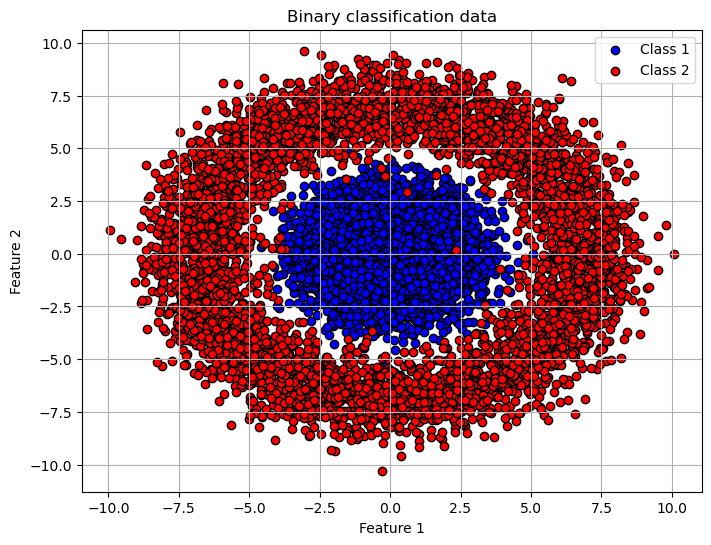

In [66]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 5000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

#take 90% of data for training and 10% for testing from each class and then combine
train_size = int(0.9 * n_samples)

class1_train = class1_data[:train_size]
class2_train = class2_data[:train_size]
x_train = np.concatenate((class1_train, class2_train), axis=0)
y_train = np.concatenate((np.zeros(train_size), np.ones(train_size)), axis=0)

class1_test = class1_data[train_size:]
class2_test = class2_data[train_size:]
x_test = np.concatenate((class1_test, class2_test), axis=0)
y_test = np.concatenate((np.zeros(n_samples - train_size), np.ones(n_samples - train_size)), axis=0)

# Plot the data
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1', edgecolors='k')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.show()



Accuracy of Logistic Regression on Non-linearly seperable data: 51.00%
Epoch 100/500 , Train Loss: 0.1407, Train Accuracy: 88.8889 , Validation Loss: 0.2521, Validation Accuracy: 74.4444
Epoch 200/500 , Train Loss: 0.1073, Train Accuracy: 98.1728 , Validation Loss: 0.1982, Validation Accuracy: 97.5556
Epoch 300/500 , Train Loss: 0.0912, Train Accuracy: 98.5926 , Validation Loss: 0.1635, Validation Accuracy: 98.7778
Epoch 400/500 , Train Loss: 0.0798, Train Accuracy: 98.7284 , Validation Loss: 0.1384, Validation Accuracy: 99.0000
Epoch 500/500 , Train Loss: 0.0718, Train Accuracy: 98.7654 , Validation Loss: 0.1168, Validation Accuracy: 98.8889
network trained with Adam optimizer


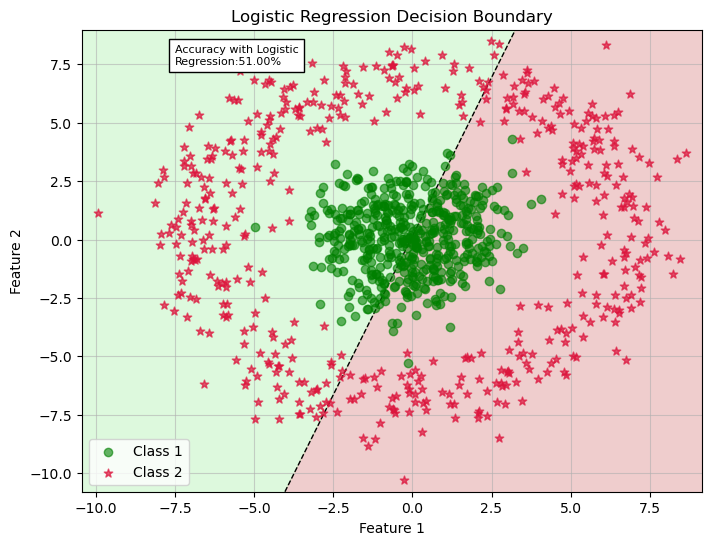


Evaluating the performance of network trained with Adam optimizer : 
Test Loss: 4510.1249, Test Accuracy: 98.80%


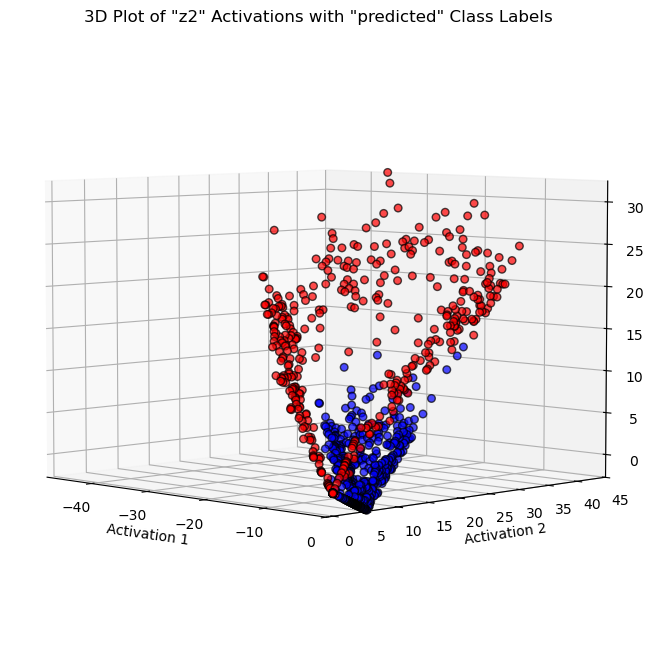

In [68]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################

Y_pred, w_Logistic = Logistic_Regression(x_train, y_train, x_test)
acc = 100*np.mean(y_test == Y_pred)
print(f"Accuracy of Logistic Regression on Non-linearly seperable data: {acc:.2f}%")


##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

trained_weights, trained_bias = trainingAdamNew(x_train, y_train, batch_size=128, epochs=500, train_val_split=0.9, learning_rate=0.001, names = ['ReLu', 'ReLu', 'Sigmoid'],print_it = 'print')
print("network trained with Adam optimizer")

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################

#For logistic regression
x_min, x_max = x_test[:, 0].min() - 0.5, x_test[:, 0].max() + 0.5
y_min, y_max = x_test[:, 1].min() - 0.5, x_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
X_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = sigmoid(X_grid @ w_Logistic)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-np.inf, 0.5, np.inf], colors=['indianred','lightgreen'], alpha=0.3, zorder= 1)
plt.contour(xx, yy, Z, levels=[0, 0.5, 1], colors="black",linestyles = '--', linewidths=1, zorder = 2)
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1],alpha = 0.6,color='green', label='Class 1', zorder = 4)
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1],alpha= 0.7,s= 40, marker='*', color='crimson', label='Class 2', zorder = 5)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.text(-7.5, 7.5, f'Accuracy with Logistic\nRegression:{acc:.2f}%',fontsize=8, bbox=dict(facecolor='white', alpha=1.0), zorder = 6)
plt.grid(alpha=0.6, zorder = 3)
plt.legend()
plt.show()

# for DNN (not so deep ofcourse)
print("\nEvaluating the performance of network trained with Adam optimizer : ")
  
#Compute outputs on test data
_, _, a2, _, _, test_out = (fwdPropagateNew(x_test, trained_weights, trained_bias))
#Compute test accuracy, and test error
test_pred = np.where((test_out.reshape(-1)) >=0.5, 1, 0) #np.max(test_out, axis=1)
te_true = y_test.reshape(-1, 1)
test_true = np.where((te_true.reshape(-1)) >=0.5, 1, 0) #np.max(te_targets, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8) + (1 - y_test) * np.log(1 - test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

# Plot the 2nd layer activation potentials in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if label == 1 else 'blue' for label in test_pred]
ax.scatter(a2[:, 0], a2[:, 1], a2[:, 2], c=colors, alpha=0.7, s=30, edgecolors='k')
ax.set_title('3D Plot of "z2" Activations with "predicted" Class Labels')
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
ax.set_xlim(-1+ np.min(a2[:, 0]), np.max(a2[:, 0]) + 0.01)
ax.set_ylim(-1+ np.min(a2[:, 1]), np.max(a2[:, 1]) + 0.01)
ax.set_zlim(np.min(a2[:, 2]), np.max(a2[:, 2]) + 0.01)
ax.view_init(elev=5, azim=-45)
plt.show()


**Report your observations**

1. As expected, the linear classifier performs well on the linearly separable data. The accuracy is around $99\%$ for the _lOGISTIC REGESSION_.  
The same _Logistic Regression_ model performs poorly on the non-linearly separable data. The accuracy is around $50\%$ for the _Logistic Regression_ model.  
This is already intuitively expected  because the decision boundary of the linear classifier is a straight line, while the decision boundary of the non-linear classifier is a non-linear curve

2. when comming to the _DNN_ based classification model, it doen't perform good on both linearly separable and non-linearly separable data.  
The accuracy for the linearly separable data is around $50\% \sim 75\%$ and is more arround $70\%$ here because the activation function asked to use here was _ReLu_ which nullifies the impact of $-ve$ activations thus, giving raise to the case that the class labels for class2 arn't correctly classified here.

3. when DNN is applied for non-linearly seperable data, the accuracy is around $50\%$ which is expected due to the activation function used here

4. To be observed , when the activations used are $[Tanh, Tanh, Sigmoid]$ , the accuracy is around $99.4\%$ for both linearly separable and non-linearly separable data.
5. If the activations were used $[ReLu, ReLu, Sigmoid]$ and the activations $\vec{a}_{1}, \vec{a}_{2}, \vec{a}_{3}$ are added with biases $\vec{b}_{1}, \vec{b}_{2}, \vec{b}_{3}$, then the accuracy is increased to $\ge 90\%$ for both linearly separable and non-linearly separable data.

